In [1]:
from main_generative import *
import dataset_B as B
import dataset_E as E
import dataset_P as P

/Users/stavasilyev/Desktop/University/CVPR/main_generative.py:232: SyntaxWarning: invalid escape sequence '\M'
  print(f"\Mean deviation on set {set_name}: {round(avg_dev, 2)}%\n")



===== Локальный просмотр решения =====
Итоговая стоимость маршрута (Best Cost): 899.26
Маршрут #1: [22, 74, 73, 75, 76, 5, 77, 51, 33, 91, 64, 11, 63, 8, 49, 83, 9, 46, 47, 48, 37, 50, 65, 12, 20, 89, 53]
	Длина (подмаршрута) = 258.05
Маршрут #2: [90, 19, 84, 61, 94, 86, 92, 45, 17, 62, 18, 85, 6, 100, 97, 7, 95, 14, 13, 81, 69, 78, 2, 70, 32, 28]
	Длина (подмаршрута) = 179.73
Маршрут #3: [27, 55, 25, 30, 79, 35, 36, 72, 66, 67, 21, 31, 71, 52, 10, 82, 34, 80, 4, 29, 54, 59, 41, 3, 58, 43, 38, 99, 60]
	Длина (подмаршрута) = 241.72
Маршрут #4: [96, 98, 88, 16, 42, 23, 57, 24, 68, 40, 26, 56, 44, 15, 39, 87, 101, 93]
	Длина (подмаршрута) = 219.75


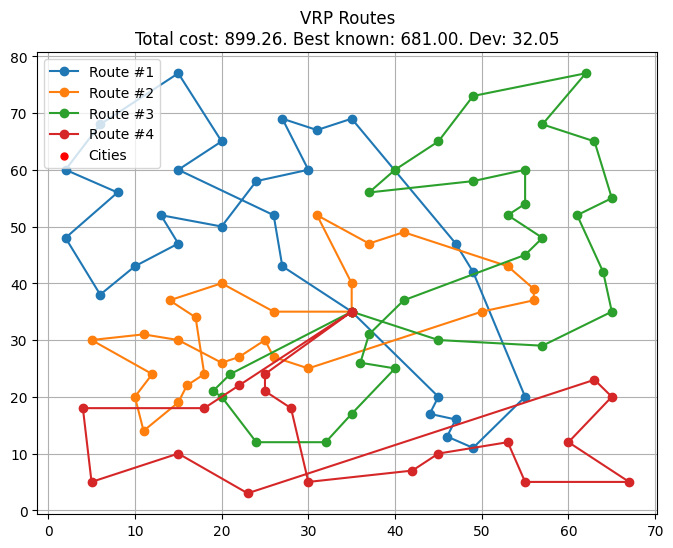

In [22]:
solver = GeneticForCVRP(
    population_size=800,
    generations=1400,
    elite_size=300,
    mutation_rate=0.3,
    seed=42
)

coordinates, demands, capacity, car, best_known = P.test_23()
best_cost, best_routes = solver.solve(demands, coordinates, capacity)

show_solution(best_known, best_cost, best_routes, demands, coordinates, capacity, solver)

# Аналитика результатов

In [17]:
import pandas as pd

df = pd.read_csv("results.csv")

df.describe()

,TestID,Time,BestFound,BestKnown,Deviation(%)
count,58.000000,58.000000,58.000000,58.000000,58.000000
mean,10.862069,64.623966,832.362241,755.017241,9.592414
std,6.562649,24.572804,340.351472,297.850280,8.472191
min,1.000000,22.200000,212.660000,211.000000,0.270000
25%,5.250000,46.340000,608.457500,568.250000,3.242500
50%,10.000000,67.310000,819.890000,738.000000,7.515000
75%,16.000000,81.705000,977.805000,854.500000,13.902500
max,23.000000,125.920000,1731.480000,1598.000000,37.380000


### В среднем по всем сетам мы ошибаемся на 9.59%

In [21]:
df.groupby('Set').describe()[['Deviation(%)']]

Deviation(%)                                                         
           count       mean        std   min    25%    50%     75%    max
Set                                                                      
B           23.0   8.527826   5.361967  0.58  3.665   7.51  12.435  20.83
E           12.0  12.225000  10.181892  0.27  3.015  12.39  23.090  26.29
P           23.0   9.283478  10.015951  0.29  1.155   6.63  13.730  37.38

### Самым проблемным сетом стал сет E

In [24]:
df['Time'].sum() / 60

62.469833333333334

### Если бы не параллельность, то полный прогон всех тестов занял бы 1 час. Когда на самом деле все отработало за ~5 минут